In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

from keras import Sequential
from keras.models import Model, load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras import regularizers

from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,normalize



In [2]:
train = pd.read_csv("E:/LEI 5/TCC/Monografia/dataset/UNSW-NB15/Project TCC/multi_data")
test = pd.read_csv("E:/LEI 5/TCC/Monografia/dataset/UNSW-NB15/UNSW_NB15_testing-set.csv")

#combined_data = pd.concat([train, test]).drop(['id'],axis=1)

In [3]:
train.head()

,Unnamed: 0,dttl,swin,dwin,tcprtt,synack,ackdat,label,proto_tcp,proto_udp,service_dns,state_CON,state_FIN,attack_cat_Analysis,attack_cat_DoS,attack_cat_Exploits,attack_cat_Normal
0,3,252,255,255,0.000000,0.000000,0.000000,6,1,0,0,0,1,0,0,0,1
1,11,252,255,255,0.131140,0.052852,0.078288,6,1,0,0,0,1,0,0,0,1
2,15,0,0,0,0.000000,0.000000,0.000000,6,0,1,0,0,0,0,0,0,1
3,17,252,255,255,0.120313,0.059201,0.061112,6,1,0,0,0,1,0,0,0,1
4,21,252,255,255,0.154433,0.055109,0.099324,6,1,0,0,0,1,0,0,0,1


In [16]:
from sklearn.model_selection import validation_curve

In [5]:
X = train.drop(columns=['label'],axis=1)
y = train['label']

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training set

smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after oversampling

print("Class distribution before oversampling:")
print(pd.Series(y_train).value_counts())

print("Class distribution after oversampling:")
print(pd.Series(y_train_oversampled).value_counts())


Class distribution before oversampling:
5    31668
6    15623
3    12878
2     1424
4     1376
7     1364
0      438
8       85
1       82
Name: label, dtype: int64
Class distribution after oversampling:
5    31668
3    31668
6    31668
7    31668
2    31668
0    31668
4    31668
8    31668
1    31668
Name: label, dtype: int64


In [7]:
X_train_oversampled.shape , y_train_oversampled.shape

((285012, 16), (285012,))

In [8]:
from time import time

t0 = time()

RFC = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1).fit(X_train_oversampled, y_train_oversampled)  

tt = time() - t0

RFC.score(X_train,y_train)  


print ("Classifier trained in {} seconds.".format(round(tt, 3)))

0.9972743232005913

Classifier trained in 41.79 seconds.


In [18]:
RFC.score(X_train_oversampled, y_train_oversampled)

0.9981509550475067

Text(0.5, 0, 'Number of Trees')

Text(0, 0.5, 'Accuracy (%)')

Text(0.5, 1.0, 'Training Accuracy VS Validation Accuracy')

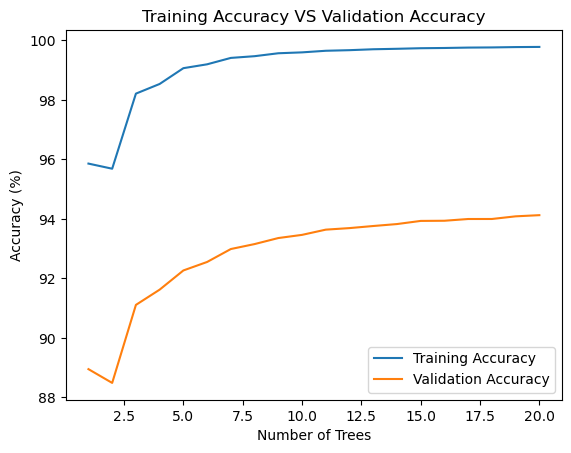

In [9]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 11)

# compute the training and validation scores for each value of n_estimators
train_scores, valid_scores = validation_curve(RFC, X_train_oversampled, y_train_oversampled, param_name='n_estimators', param_range=param_range,
                                              cv=10, scoring='accuracy')

# plot the mean training and validation scores for each value of n_estimators
plt.plot(param_range, np.mean(train_scores, axis=1) * 100, label='Training Accuracy')
plt.plot(param_range, np.mean(valid_scores, axis=1) * 100, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy VS Validation Accuracy')
plt.legend()
plt.show()

In [8]:
acc = RFC.score(X_test,y_test)

#print("Accuracy: %0.5f for the %s" % (acc))
print ("Accuracy is {}".format(round(acc,4)))

Accuracy is 0.9591


In [9]:
y_pred = RFC.predict(X_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)

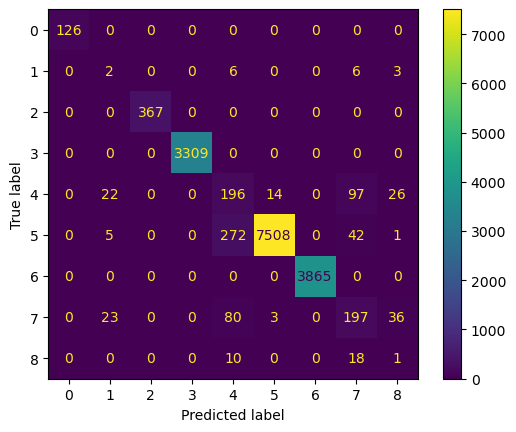

In [11]:
disp =  ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       0.04      0.12      0.06        17
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00      3309
           4       0.35      0.55      0.43       355
           5       1.00      0.96      0.98      7828
           6       1.00      1.00      1.00      3865
           7       0.55      0.58      0.56       339
           8       0.01      0.03      0.02        29

    accuracy                           0.96     16235
   macro avg       0.66      0.69      0.67     16235
weighted avg       0.97      0.96      0.97     16235



Text(0.5, 0, 'Class')

Text(0, 0.5, 'False Positive Rate (FPR)')

Text(0.5, 1.0, 'False Positive Rate (FPR) for each Class')

([<matplotlib.axis.XTick at 0x16719044550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

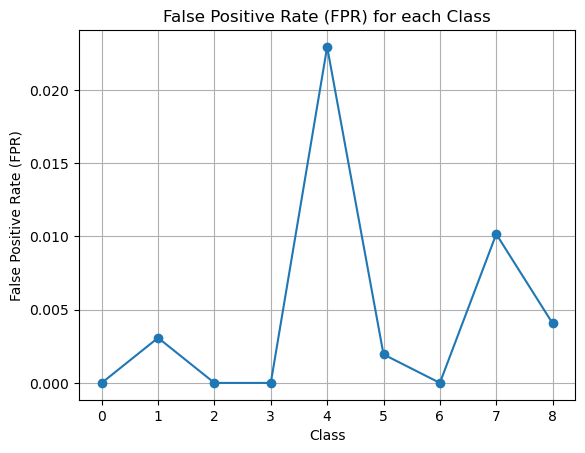

In [14]:
false_negatives = np.diag(cm) - np.sum(cm, axis=1)

# Calculate the rate of false negatives for each class
false_neg_rate = false_negatives / np.sum(cm, axis=1)

# Plot the rate of false negatives
#classes = np.unique(y)
#plt.bar(classes, false_neg_rate)
#plt.xlabel('Class')
#plt.ylabel('Rate of False Negatives')
#plt.title('Rate of False Negatives for each Class')
#plt.show()

# Calculate the False Positive Rate (FPR) for each class
FP = cm.sum(axis=0) - np.diag(cm)
TN = cm.sum() - (FP + np.diag(cm))
FPR = FP / (FP + TN)

# Plot the FPR for each class
classes = np.unique(y)
plt.plot(classes, FPR, marker='o', linestyle='-')
plt.xlabel('Class')
plt.ylabel('False Positive Rate (%) ')
plt.title('False Positive Rate (FPR) for each Class')
plt.xticks(classes)
plt.grid(True)
plt.show()

In [13]:
from sklearn import metrics 

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Precision:", metrics.precision_score(y_test, y_pred, average = "micro"))
print("Recall:", metrics.recall_score(y_test, y_pred, average = "micro"))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average = "micro"))

Mean Absolute Error -  0.0866646134893748
Mean Squared Error -  0.2599938404681244
Root Mean Squared Error -  0.5098959114055773
Precision: 0.9591007083461657
Recall: 0.9591007083461657
F1 Score: 0.9591007083461657


In [18]:
from sklearn.model_selection import cross_val_score

acc_v = cross_val_score(estimator=RFC, X=X_train_oversampled, y=y_train_oversampled, cv=10)
print("scores for each fold")
for val in acc_v:
    print(val)


scores for each fold
0.9505999578976914
0.9434074801768297
0.9441773972843058
0.9462124135995228
0.9437212729377916
0.9432651485912775
0.9440019648433389
0.9468790568751974
0.9455106838356548
0.9450194730009474


In [19]:
print(np.mean(acc_v))
print()
print(np.std(acc_v))

0.9452794849042558

0.0021140981550558744


Text(0.5, 0, 'Fold')

Text(0, 0.5, 'Training Accuracy')

Text(0.5, 1.0, 'Training Accuracy for 10-Fold Cross-Validation')

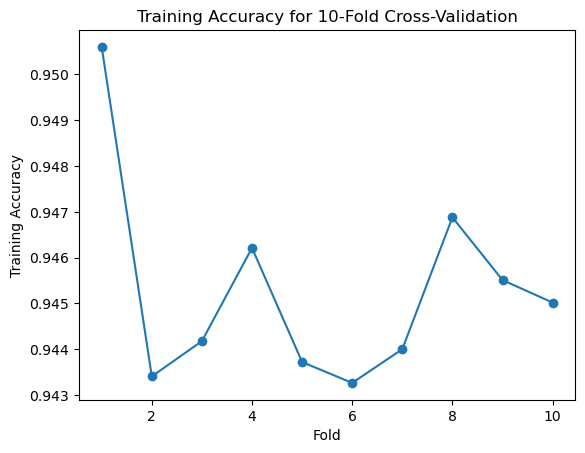

In [20]:
from sklearn.model_selection import cross_val_score

#train_acc_scores = cross_val_score(estimator=RFC, X=X_train, y=y_train, cv=10, scoring='accuracy')

# plot the training accuracy for each fold
plt.plot(np.arange(1,11), acc_v, marker='o')
plt.xlabel('Fold')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy for 10-Fold Cross-Validation')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
pre_v = cross_val_score(RFC, X_train_oversampled, y_train_oversampled, cv=10, scoring='precision_micro')
print("precision for each fold")
for val_p in pre_v:
    print(val_p)

precision for each fold
0.9505999578976914
0.9434074801768297
0.9441773972843058
0.9462124135995228
0.9437212729377916
0.9432651485912775
0.9440019648433389
0.9468790568751974
0.9455106838356548
0.9450194730009474


In [17]:
print(np.mean(pre_v))
print()
print(np.std(pre_v))

0.9452794849042558

0.0021140981550558744


In [18]:
rec_v = cross_val_score(RFC, X_train_oversampled, y_train_oversampled, cv=10, scoring='recall_micro')
print("Recall for each fold")
for val_c in rec_v:
    print(val_c)

Recall for each fold
0.9505999578976914
0.9434074801768297
0.9441773972843058
0.9462124135995228
0.9437212729377916
0.9432651485912775
0.9440019648433389
0.9468790568751974
0.9455106838356548
0.9450194730009474


In [ ]:
print(np.mean(rec_v))
print()
print(np.std(rec_v))

In [19]:
f1_v = cross_val_score(RFC, X_train_oversampled, y_train_oversampled, cv=10, scoring='f1_micro')
print("F1_Score for each fold")
for val_f in f1_v:
    print(val_f)

F1_Score for each fold
0.9505999578976914
0.9434074801768297
0.9441773972843058
0.9462124135995228
0.9437212729377916
0.9432651485912775
0.9440019648433389
0.9468790568751974
0.9455106838356548
0.9450194730009474


Text(0.5, 0, 'Fold')

Text(0, 0.5, 'Error Rate')

Text(0.5, 1.0, 'Training Error Rate vs. Fold')

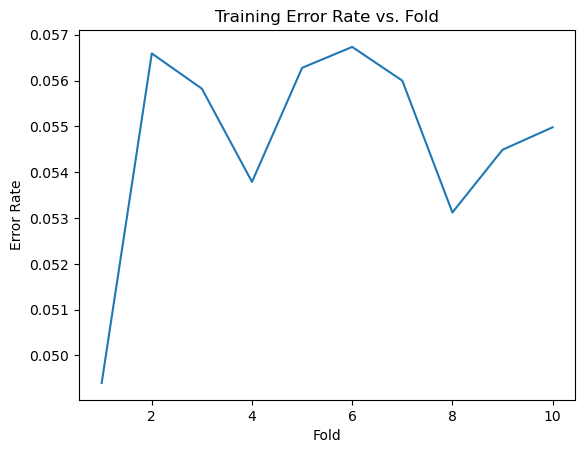

In [21]:
cv_scores = cross_val_score(estimator=RFC, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='accuracy') 

# plot the training loss for each fold
plt.plot(range(1, 11), 1 - cv_scores)
plt.xlabel('Fold')
plt.ylabel('Error Rate')
plt.title('Training Error Rate vs. Fold')
plt.show()

In [22]:
print(np.mean(1 - cv_scores))

0.05472051509574427


Text(0.5, 0, 'Fold')

Text(0, 0.5, 'Validation Loss')

Text(0.5, 1.0, 'Validation Loss for 10-Fold Cross-Validation')

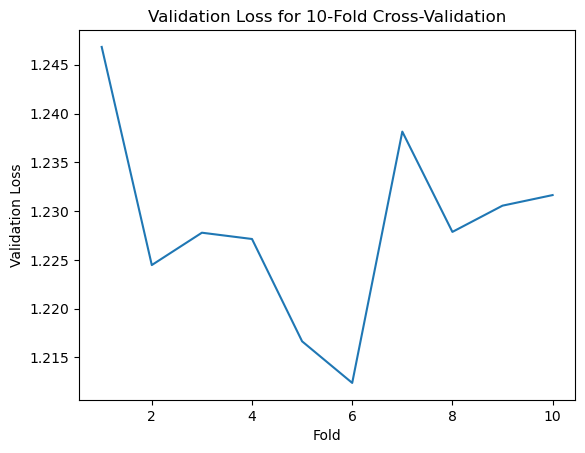

In [24]:
loss_cv_scores = cross_val_score(estimator=RFC, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='neg_log_loss')

# plot the validation loss for each fold
plt.plot(range(1, 11), 1 - loss_cv_scores)
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for 10-Fold Cross-Validation')
plt.show()